# Two-way anova

In [ ]:
import pandas as pd
import statsmodels.api as sm
from statsmodels.formula.api import ols
from statsmodels.stats.anova import anova_lm
from statsmodels.graphics.factorplots import interaction_plot
import matplotlib.pyplot as plt
from scipy import stats

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [ ]:
#datafile = read_csv("https://vincentarelbundock.github.io/Rdatasets/csv/datasets/ToothGrowth.csv")
data = pd.read_csv('https://vincentarelbundock.github.io/Rdatasets/csv/datasets/ToothGrowth.csv')

In [ ]:
data

,Unnamed: 0,len,supp,dose
0,1,4.2,VC,0.5
1,2,11.5,VC,0.5
2,3,7.3,VC,0.5
3,4,5.8,VC,0.5
4,5,6.4,VC,0.5
5,6,10.0,VC,0.5
6,7,11.2,VC,0.5
7,8,11.2,VC,0.5
8,9,5.2,VC,0.5
9,10,7.0,VC,0.5


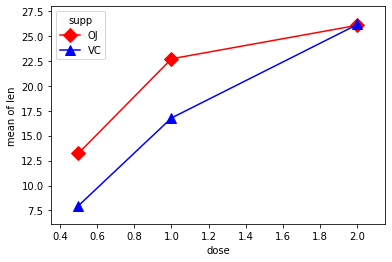

In [ ]:
fig = interaction_plot(data.dose, data.supp, data.len,
             colors=['red','blue'], markers=['D','^'], ms=10)

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

## Degree of freedom

In [ ]:
N = len(data.len)
df_a = len(data.supp.unique()) - 1
df_b = len(data.dose.unique()) - 1
df_axb = df_a*df_b 
df_w = N - (len(data.supp.unique())*len(data.dose.unique()))

In [ ]:
grand_mean = data['len'].mean() # The grand mean is simply the mean of all scores of len